# Exemple - Linear Regression
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

+ numpy : 배열 처리 모듈
+ pyplot : 그래픽 처리용 모듈

In [3]:
#데이터 생성 함수
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)

    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i

        y[i] = (i+bias) + random.uniform(0, 1) * variance
    return x, y

x는 feature  
y는 target  

np.zeros(shape=(x,y)) : 0값으로 초기화 되어있는 배열 shape 모양의 n차원 배열 생성  
  
x의 모든 1차원 안의 0차원 0번째 값은 1로 입력  
x의 모든 1차원 안의 0차원 1번째 값은 0~99까지 입력    

y엔 x의 값에 대한 목표 생성  
random.uniform(x1, x2)는 x1 ~ x2까지의 랜덤한 실수를 반환

In [4]:
x, y = gen_data(100, 25, 10)

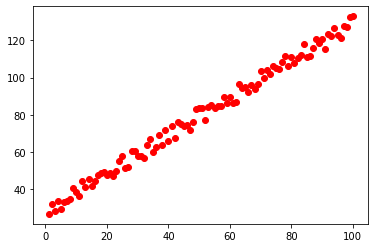

In [5]:
#r옵션: 붉은색, o옵션 o모양
#x의 1차원의 모든 요소의 0차원의 1번째 요소 전부 그래프에 그린다
plt.plot(x[:,1]+1,y,"ro")
plt.show()

In [6]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        
        cost = np.sum(loss ** 2) / (2 * m)
        
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
        if i % 2500 == 0:
            theta_list.append(theta)
    return theta,np.array(theta_list)

+ xTrans : x의 배열 구조를 전치
+ numlterations : 데이터 셋에 대한 학습 사이클 회수
+ m : 데이터의 개수
+ theta_list : 각도리스트
+ hypothesis : 가설 - np.dot()행렬 연산을 통해 생성
+ loss : 손실 함수
+ cost : 비용 함수, 평균 제곱 오차(단 여기서 사용하진 않음)
+ alpha : 학습률
+ gradient : 기울기

In [19]:
m, n = np.shape(x) #x원소 개수 -> m
numIterations= 50000 #학습 반복회수
alpha = 0.0005 #학습율
#np.ones(n) : n 크기 만큼의 1로 초기화된 배열 생성
theta = np.ones(n) #초기 기울기 값
theta

array([1., 1.])

In [20]:
theta,theta_list = gradient_descent(x, y, theta, alpha, m, numIterations)

In [24]:
y_predict_step= np.dot(x, theta_list.transpose()) #모든 x값에 대한 기울기를 서로 곱해서 y값을 만듬(행렬 메트릭스 형태)
y_predict_step

array([[  1.01458078,   8.71561782,  14.3267554 , ...,  29.23199559,
         29.26708724,  29.2926415 ],
       [  2.74306674,  10.04305129,  15.56959232, ...,  30.25011303,
         30.28467562,  30.30984462],
       [  4.4715527 ,  11.37048476,  16.81242924, ...,  31.26823047,
         31.302264  ,  31.32704773],
       ...,
       [168.67771853, 137.47666448, 134.88193667, ..., 127.98938758,
        127.97316033, 127.96134342],
       [170.40620449, 138.80409795, 136.12477359, ..., 129.00750502,
        128.99074872, 128.97854653],
       [172.13469045, 140.13153142, 137.36761051, ..., 130.02562246,
        130.0083371 , 129.99574964]])

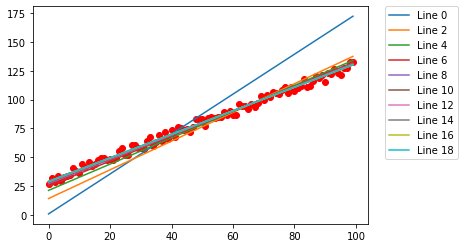

In [26]:
plt.plot(x[:,1],y,"ro") #점찍기, 붉은색, o모양
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i], label='Line %d'%i) #모든 학습과정 직선 그리기. x값에 대한 y. 범주는 Line %d형태로

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #범주 모양새 설정, bbox_to_anchor:loc을 기준으로 x,y위치 조정, borderaxespad : 테두리 보더 설정
plt.show()

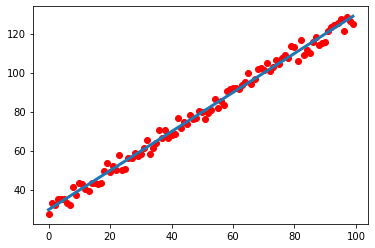

In [17]:
y_predict= np.dot(x, theta) #학습 완료했을 때의 y값
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3) #학습 완료 한 뒤 그래프 그리기
plt.show()